In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://www.flipkart.com/search?q=television'

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

products = soup.find_all('div', {'class': '_1AtVbE'})

names = []
prices = []
ratings = []

for product in products:
    name_element = product.find('div', {'class': '_4rR01T'})
    name = name_element.text.strip() if name_element else 'N/A'
    names.append(name)
    
    price_element = product.find('div', {'class': '_30jeq3 _1_WHN1'})
    price = price_element.text.strip() if price_element else 'N/A'
    prices.append(price)
    
    rating_element = product.find('div', {'class': '_3LWZlK'})
    rating = rating_element.text.strip() if rating_element else 'N/A'
    ratings.append(rating)


data = {'Name': names, 'Price': prices, 'Rating': ratings}

df = pd.DataFrame(data)

df.to_csv('television_data.csv', index=False)


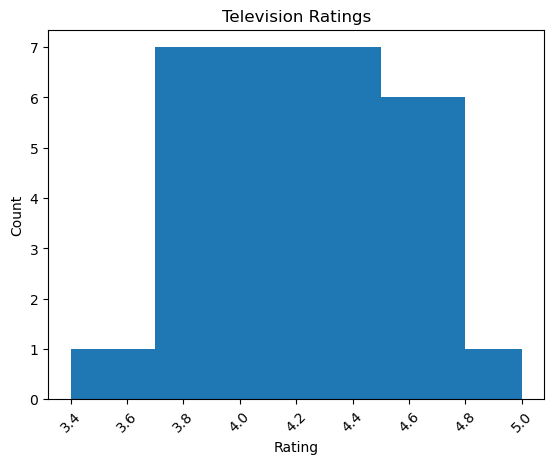

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('television_data.csv')

rating_counts = df['Rating'].value_counts()

plt.bar(rating_counts.index, rating_counts.values)

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Television Ratings')

plt.xticks(rotation=45)

plt.show()
